In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## MNIST 데이터셋
데이터의 키에는 
> DESCR: 데이터셋을 설명  
DATA: 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열  
target: 레이블 배열

In [3]:
x, y = mnist["data"], mnist["target"]
print(x.shape, y.shape)

(70000, 784) (70000,)


data는 28 x 28 크기의 흑백 이미지임  
각 픽셀은 0 ~ 255 사이의 값을 가짐  

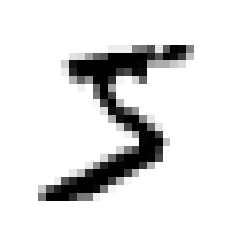

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.iloc[0].to_numpy()
some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap="binary")
plt.axis("off")
plt.show()

In [15]:
y[0]

'5'

시험삼아 제일 첫 번째 행의 샘플을 확인  
그림은 5로 보임, 레이블도 5라고 되어 있음

In [59]:
import numpy as np
y = y.astype(np.uint8)

현재 레이블이 글자로 되어있음  
대부분의 모델은 입력을 숫자로 받으므로 **숫자형 타입**으로 바꿔줘야 함

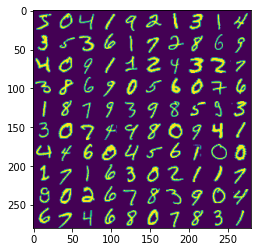

In [60]:
import numpy as np

col = 10
row = 10

img = np.array([])
for r in range(row):
    temp_row_digit = x.iloc[r*10].to_numpy()
    temp_row_img = temp_row_digit.reshape(28, 28)
    for c in range(1, col):
        idx = r*10 + c
        temp_digit = x.iloc[idx].to_numpy()
        temp_digit_img = temp_digit.reshape(28, 28)
        temp_row_img = np.append(temp_row_img, temp_digit_img, axis=1)
    if r == 0:
        img = temp_row_img
    else:
        img = np.append(img, temp_row_img, axis=0)

plt.imshow(img)
plt.show()

처음 100개 샘플을 이미지 형태로 살펴본 모습  
***

In [61]:
x_train, x_test = x[: 60000], x[60000: ]
y_train, y_test = y[: 60000], y[60000: ]

데이터를 자세히 조사하기 전에는 항상 **테스트세트**를 만들고 따로 떼어놓아야 함  
훈련세트는 이미 섞여 있어서 모든 교차 검증 폴드를 비슷하게 만듦 ***이때 하나의 폴드라도 특정 샘플이 누락되면 안됨***  
어떤 학습 알고리즘은 훈련 샘플의 순서에 민감하므로  
> **많은 비슷한 샘플이 연이어 나타나면 성능이 나빠짐**  
데이터 셋을 섞으면 이런 문제 방지 가능

In [62]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

숫자 5만 식별하는 **이진 분류기**를 만들 목적으로 학습, 테스트셋 분리

In [63]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

## 이진분류기 예시  


In [64]:
sgd_clf.predict(x_test)

array([False, False, False, ..., False,  True, False])

In [65]:
sgd_clf.predict([some_digit])

array([ True])

아까 some_digit는 5였음  
학습한 분류기로 예측해보니 정답이라고 함  
이제 모델을 평가해 보겠음